# Lab 3 - Data Analysis

# Task 1
### 1

In [163]:
import pandas as pd

dataset = pd.read_csv('dataset/Data2.csv', sep=';', encoding='cp1252', decimal=',')
dataset

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0
...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,NaN,102951.0,NaN,350.0
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,NaN,6020.0
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730,527970.0
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076,752610.0


In [164]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


### 2

In [165]:
dataset.head(10)

,Country Name,Region,GDP per capita,Populatiion,CO2 emission,Area
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225,652860.0
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853,28750.0
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217,2381740.0
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,NaN,200.0
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042,470.0
5,Angola,Sub-Saharan Africa,3308.700233,28813463.0,34763.160,1246700.0
6,Antigua and Barbuda,Latin America & Caribbean,14462.176280,100963.0,531.715,440.0
7,Argentina,Latin America & Caribbean,12440.320980,43847430.0,204024.546,2780400.0
8,Armenia,Europe & Central Asia,3614.688357,2924816.0,5529.836,29740.0
9,Aruba,Latin America & Caribbean,NaN,104822.0,872.746,180.0


In [166]:
dataset.isna().any()

Country Name      False
Region            False
GDP per capita     True
Populatiion        True
CO2 emission       True
Area              False
dtype: bool

In [167]:
dataset = dataset.fillna(dataset.mean(numeric_only=True))

In [168]:
dataset.isna().any()

Country Name      False
Region            False
GDP per capita    False
Populatiion       False
CO2 emission      False
Area              False
dtype: bool

### 3

In [169]:
dataset.describe()

,GDP per capita,Populatiion,CO2 emission,Area
count,217.000000,2.170000e+02,2.170000e+02,2.170000e+02
mean,13374.833168,3.432256e+07,1.651141e+05,6.126082e+05
std,16923.316040,1.344477e+08,8.100511e+05,1.829940e+06
min,-6722.223536,1.109700e+04,1.100100e+01,-6.765900e+05
25%,2338.692157,7.956010e+05,1.954511e+03,1.045000e+04
50%,7179.340661,6.293253e+06,1.156205e+04,9.222500e+04
75%,14428.140260,2.369592e+07,8.256251e+04,4.474000e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


In [170]:
dataset = dataset.rename(columns={'Populatiion': 'Population'})
dataset['GDP per capita'], dataset['Area'] = dataset['GDP per capita'].abs(), dataset['Area'].abs()
dataset.describe()

,GDP per capita,Population,CO2 emission,Area
count,217.000000,2.170000e+02,2.170000e+02,2.170000e+02
mean,13436.789146,3.432256e+07,1.651141e+05,6.188441e+05
std,16873.938339,1.344477e+08,8.100511e+05,1.827830e+06
min,285.727442,1.109700e+04,1.100100e+01,2.000000e+00
25%,2361.160205,7.956010e+05,1.954511e+03,1.088700e+04
50%,7179.340661,6.293253e+06,1.156205e+04,9.303000e+04
75%,14428.140260,2.369592e+07,8.256251e+04,4.474200e+05
max,100738.684200,1.378665e+09,1.029193e+07,1.709825e+07


### 4

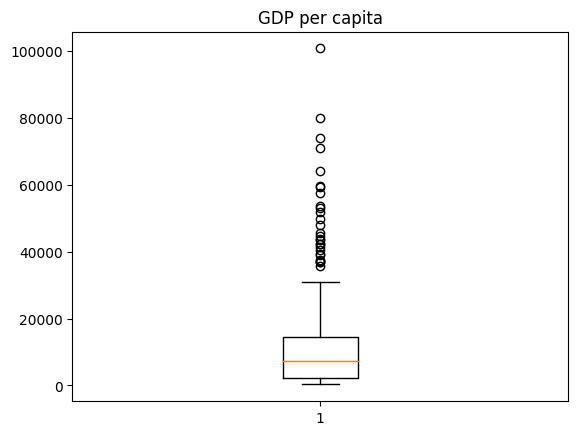

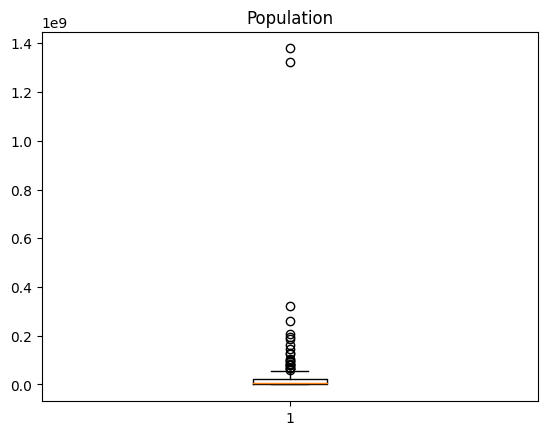

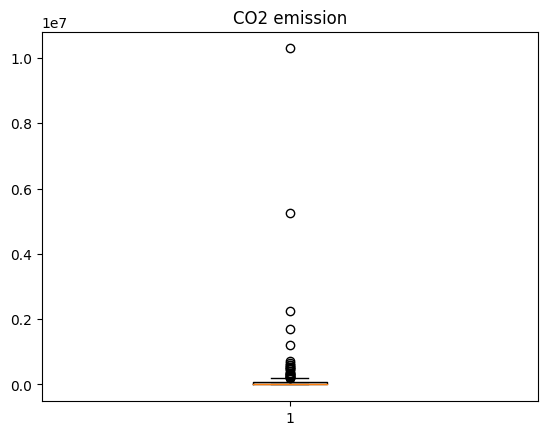

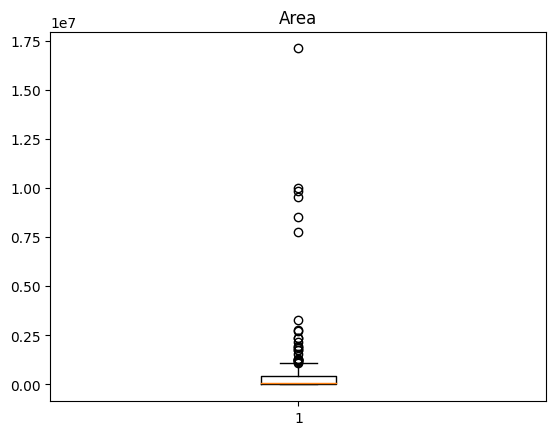

In [171]:
import matplotlib.pyplot as plt

for column in dataset.columns:
    if dataset[column].dtype == float:
        plt.figure()
        plt.title(column)
        plt.boxplot(dataset[column])

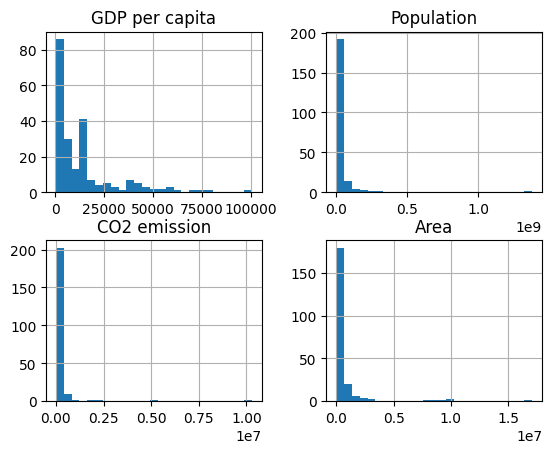

In [172]:
dataset.hist(bins=25)
plt.show()

### 5

In [173]:
dataset['Population density'] = dataset['Population'] / dataset['Area']
dataset

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660
...,...,...,...,...,...,...,...
212,Virgin Islands (U.S.),Latin America & Caribbean,13374.833168,102951.0,165114.116337,350.0,294.145714
213,West Bank and Gaza,Middle East & North Africa,2943.404534,4551566.0,165114.116337,6020.0,756.074086
214,"Yemen, Rep.",Middle East & North Africa,990.334774,27584213.0,22698.730000,527970.0,52.245796
215,Zambia,Sub-Saharan Africa,1269.573537,16591390.0,4503.076000,752610.0,22.045136


# Task 2 (additional)
### 2

In [174]:
max_gdp_country = dataset.loc[dataset['GDP per capita'].idxmax()]
print('The country with the largest GDP per capita is', max_gdp_country['Country Name'],'with value', max_gdp_country['GDP per capita'])

The country with the largest GDP per capita is Luxembourg with value 100738.6842


In [175]:
min_area_country = dataset.loc[dataset['Area'].idxmin()]
print('The smallest country is', min_area_country['Country Name'], 'with area', min_area_country['Area'])

The smallest country is Monaco with area 2.0


### 3

In [176]:
regions_grouped_by_area = dataset.groupby('Region')['Area'].mean()
regions_grouped_by_area.head()

Region
East Asia & Pacific           6.699799e+05
Europe & Central Asia         4.907089e+05
Latin America & Caribbean     4.863210e+05
Middle East & North Africa    5.414577e+05
North America                 6.605410e+06
Name: Area, dtype: float64

In [177]:
max_region_by_average_area = regions_grouped_by_area.idxmax()
print('Region with the largest average area is', max_region_by_average_area)

Region with the largest average area is North America


### 4

In [178]:
country_with_max_density = dataset.loc[dataset['Population density'].idxmax()]
print('The country with max population density is', country_with_max_density['Country Name'], 'with value', country_with_max_density['Population density'])

The country with max population density is Macao SAR, China with value 20203.531353135313


In [179]:
country_with_max_density_eu_ca = dataset.loc[
    dataset[dataset['Region'] == 'Europe & Central Asia']['Population density'].idxmax()
]
print('The country with max population density in Europe & Central Asia is', country_with_max_density_eu_ca['Country Name'], 'with value', country_with_max_density_eu_ca['Population density'])

The country with max population density in Europe & Central Asia is Monaco with value 19249.5


### 5

In [180]:
regions = dataset.groupby('Region')['GDP per capita'].agg(['mean', 'median'])
regions['Is equal'] = (regions['mean'] == regions['median'])
regions

,mean,median,Is equal
Region,,,
East Asia & Pacific,15124.489231,5910.620932,False
Europe & Central Asia,22733.595488,13374.833168,False
Latin America & Caribbean,10468.495458,10833.201075,False
Middle East & North Africa,15449.053926,13374.833168,False
North America,37732.095786,42183.295100,False
South Asia,2795.213935,1576.608412,False
Sub-Saharan Africa,2874.243005,1034.390361,False


### 6

In [181]:
country_by_gdp = dataset.sort_values(by=['GDP per capita'], ascending=False)

print('Top 5 countries by GDP per capita:')
country_by_gdp.head()

Top 5 countries by GDP per capita:


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
115,Luxembourg,Europe & Central Asia,100738.68420,582972.0,9658.878,2590.0,225.085714
188,Switzerland,Europe & Central Asia,79887.51824,8372098.0,35305.876,41290.0,202.763333
116,"Macao SAR, China",East Asia & Pacific,74017.18471,612167.0,1283.450,30.3,20203.531353
146,Norway,Europe & Central Asia,70868.12250,5232929.0,47626.996,385178.0,13.585742
92,Ireland,Europe & Central Asia,64175.43824,4773095.0,34066.430,70280.0,67.915410


In [182]:
print('5 countries by lowest GDP per capita:')
country_by_gdp.tail()

5 countries by lowest GDP per capita:


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density
118,Madagascar,Sub-Saharan Africa,401.742270,24894551.0,3076.613,587295.0,42.388495
37,Central African Republic,Sub-Saharan Africa,382.213174,4594621.0,300.694,622980.0,7.375230
134,Mozambique,Sub-Saharan Africa,382.069330,28829476.0,8426.766,799380.0,36.064795
119,Malawi,Sub-Saharan Africa,300.307665,18091575.0,1276.116,118480.0,152.697291
31,Burundi,Sub-Saharan Africa,285.727442,10524117.0,440.040,27830.0,378.157276


In [183]:
dataset['CO2 per capita'] = dataset['CO2 emission'] / dataset['Population']

country_by_co2 = dataset.sort_values(by=['CO2 per capita'], ascending=False)
print('Top 5 countries by CO2 per capita:')
country_by_co2.head()

Top 5 countries by CO2 per capita:


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,CO2 per capita
182,St. Martin (French part),Latin America & Caribbean,13374.833168,31949.0,165114.116337,54.4,587.297794,5.168053
163,San Marino,Europe & Central Asia,47908.561410,33203.0,165114.116337,60.0,553.383333,4.972867
130,Monaco,Europe & Central Asia,13374.833168,38499.0,165114.116337,2.0,19249.500000,4.288790
145,Northern Mariana Islands,East Asia & Pacific,22572.378820,55023.0,165114.116337,460.0,119.615217,3.000820
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000,2.969732


In [184]:
print('5 countries by lowest CO2 per capita:')
country_by_co2.tail()

5 countries by lowest CO2 per capita:


,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population density,CO2 per capita
44,"Congo, Dem. Rep.",Sub-Saharan Africa,405.542501,7.873615e+07,4671.758,2344860.0,33.578189,0.000059
38,Chad,Sub-Saharan Africa,664.295652,1.445254e+07,729.733,1284000.0,11.255875,0.000050
175,Somalia,Sub-Saharan Africa,434.208810,1.431800e+07,608.722,637660.0,22.453966,0.000043
31,Burundi,Sub-Saharan Africa,285.727442,1.052412e+07,440.040,27830.0,378.157276,0.000042
61,Eritrea,Sub-Saharan Africa,13374.833168,3.432256e+07,696.730,117600.0,291.858502,0.000020
